In [1]:
## Data Preperation Libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
## Cross Validation Libraries 
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
## KNN Library
from sklearn.neighbors import KNeighborsClassifier
## Library for plotting
import matplotlib.pyplot as plt
## Library for calculating performance metrics
from sklearn.metrics import classification_report, confusion_matrix  
from sklearn.metrics import accuracy_score
from sklearn import metrics
### Keras and Tensor flow libraries
import tensorflow
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation

Using TensorFlow backend.


In [2]:
data= pd.read_csv("weatherAUS.csv")
data.dropna(inplace=True)
data['RainTmr'] = np.where(data['RainTomorrow']=='Yes', '1', '0')
data['RainTod'] = np.where(data['RainToday']=='Yes', '1', '0')
##Splitting the Dataset 
train_data, test_data = train_test_split(data, test_size = 0.3, random_state = 20)
y_train=train_data['RainTmr']
y_test=test_data['RainTmr']
x_train=train_data[['MinTemp','MaxTemp','Rainfall','WindGustSpeed','WindSpeed9am','WindSpeed3pm','Humidity9am','Humidity3pm','Pressure9am','Pressure3pm','Cloud9am','Cloud3pm','Temp9am','Temp3pm','RainTod']]
x_test=test_data[['MinTemp','MaxTemp','Rainfall','WindGustSpeed','WindSpeed9am','WindSpeed3pm','Humidity9am','Humidity3pm','Pressure9am','Pressure3pm','Cloud9am','Cloud3pm','Temp9am','Temp3pm','RainTod']]
## Feature Scaling the train dataset
fea_scaling = preprocessing.StandardScaler().fit(x_train[['MinTemp','MaxTemp','Rainfall','WindGustSpeed','WindSpeed9am','WindSpeed3pm','Humidity9am','Humidity3pm','Pressure9am','Pressure3pm','Cloud9am','Cloud3pm','Temp9am','Temp3pm','RainTod']])
X_train = fea_scaling.transform(x_train[['MinTemp','MaxTemp','Rainfall','WindGustSpeed','WindSpeed9am','WindSpeed3pm','Humidity9am','Humidity3pm','Pressure9am','Pressure3pm','Cloud9am','Cloud3pm','Temp9am','Temp3pm','RainTod']])
## Feature scaling the test dataset
fea_scaling = preprocessing.StandardScaler().fit(x_test[['MinTemp','MaxTemp','Rainfall','WindGustSpeed','WindSpeed9am','WindSpeed3pm','Humidity9am','Humidity3pm','Pressure9am','Pressure3pm','Cloud9am','Cloud3pm','Temp9am','Temp3pm','RainTod']])
X_test = fea_scaling.transform(x_test[['MinTemp','MaxTemp','Rainfall','WindGustSpeed','WindSpeed9am','WindSpeed3pm','Humidity9am','Humidity3pm','Pressure9am','Pressure3pm','Cloud9am','Cloud3pm','Temp9am','Temp3pm','RainTod']])

C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype float64, object were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Aravind KK\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: DataConversionWarning: Data with input dtype float64, object were all converted to float64 by StandardScaler.
  del sys.path[0]
C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype float64, object were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Aravind KK\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype float64, object were all converted to float64 by StandardScaler.
  app.launch_new_instance()


[[12173  1094]
 [ 1787  1872]] (Test)k = 3
              precision    recall  f1-score   support

           0       0.87      0.92      0.89     13267
           1       0.63      0.51      0.57      3659

   micro avg       0.83      0.83      0.83     16926
   macro avg       0.75      0.71      0.73     16926
weighted avg       0.82      0.83      0.82     16926

0.8297884910788137
[[29467  1259]
 [ 2605  6163]] (Train)k = 3
              precision    recall  f1-score   support

           0       0.92      0.96      0.94     30726
           1       0.83      0.70      0.76      8768

   micro avg       0.90      0.90      0.90     39494
   macro avg       0.87      0.83      0.85     39494
weighted avg       0.90      0.90      0.90     39494

0.902162353775257
[[12709   558]
 [ 2179  1480]] (Test)k = 4
              precision    recall  f1-score   support

           0       0.85      0.96      0.90     13267
           1       0.73      0.40      0.52      3659

   micro avg   

              precision    recall  f1-score   support

           0       0.88      0.96      0.92     30726
           1       0.78      0.54      0.64      8768

   micro avg       0.86      0.86      0.86     39494
   macro avg       0.83      0.75      0.78     39494
weighted avg       0.86      0.86      0.85     39494

0.8645110649718944


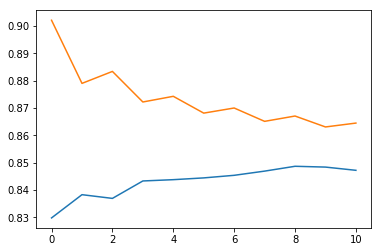

In [30]:
acc_score=[]
acc_score_train=[]
y_=[]
for i in range (3,14):
    model = KNeighborsClassifier(n_neighbors=i,metric='euclidean')
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    y_pred_train=model.predict(X_train)
    y_.append(y_pred)
    print(confusion_matrix(y_test,y_pred),'(Test)k =', i)
    print(classification_report(y_test,y_pred))
    print(accuracy_score(y_test,y_pred))
    print(confusion_matrix(y_train,y_pred_train),'(Train)k =', i)
    print(classification_report(y_train,y_pred_train))
    print(accuracy_score(y_train,y_pred_train))
    acc_score.append(accuracy_score(y_test,y_pred))
    acc_score_train.append(accuracy_score(y_train,y_pred_train))
plt.plot(acc_score)
plt.plot(acc_score_train)

[[12173  1094]
 [ 1790  1869]] (Test)k = 3
              precision    recall  f1-score   support

           0       0.87      0.92      0.89     13267
           1       0.63      0.51      0.56      3659

   micro avg       0.83      0.83      0.83     16926
   macro avg       0.75      0.71      0.73     16926
weighted avg       0.82      0.83      0.82     16926

0.8296112489660876
[[29535  1191]
 [ 2586  6182]] (Train)k = 3
              precision    recall  f1-score   support

           0       0.92      0.96      0.94     30726
           1       0.84      0.71      0.77      8768

   micro avg       0.90      0.90      0.90     39494
   macro avg       0.88      0.83      0.85     39494
weighted avg       0.90      0.90      0.90     39494

0.9043652200334228
[[12693   574]
 [ 2184  1475]] (Test)k = 4
              precision    recall  f1-score   support

           0       0.85      0.96      0.90     13267
           1       0.72      0.40      0.52      3659

   micro avg  

              precision    recall  f1-score   support

           0       0.88      0.96      0.92     30726
           1       0.79      0.53      0.63      8768

   micro avg       0.86      0.86      0.86     39494
   macro avg       0.83      0.75      0.78     39494
weighted avg       0.86      0.86      0.85     39494

0.8642325416518964


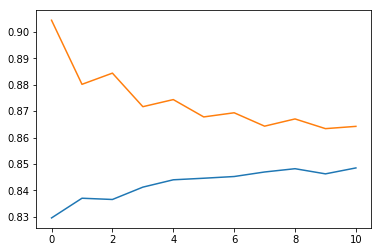

In [31]:
acc_score1=[]
acc_score1_train=[]
y1_=[]
for i in range (3,14):
    model1 = KNeighborsClassifier(n_neighbors=i,metric='manhattan')
    model1.fit(X_train,y_train)
    y_pred1=model1.predict(X_test)
    y_pred1_train=model1.predict(X_train)
    y1_.append(y_pred1)
    print(confusion_matrix(y_test,y_pred1),'(Test)k =', i)
    print(classification_report(y_test,y_pred1))
    print(accuracy_score(y_test,y_pred1))
    print(confusion_matrix(y_train,y_pred1_train),'(Train)k =', i)
    print(classification_report(y_train,y_pred1_train))
    print(accuracy_score(y_train,y_pred1_train))
    acc_score1.append(accuracy_score(y_test,y_pred1))
    acc_score1_train.append(accuracy_score(y_train,y_pred1_train))
plt.plot(acc_score1)
plt.plot(acc_score1_train)

[[12173  1094]
 [ 1787  1872]] (Test)k = 3
              precision    recall  f1-score   support

           0       0.87      0.92      0.89     13267
           1       0.63      0.51      0.57      3659

   micro avg       0.83      0.83      0.83     16926
   macro avg       0.75      0.71      0.73     16926
weighted avg       0.82      0.83      0.82     16926

0.8297884910788137
[[29467  1259]
 [ 2605  6163]] (Train)k = 3
              precision    recall  f1-score   support

           0       0.92      0.96      0.94     30726
           1       0.83      0.70      0.76      8768

   micro avg       0.90      0.90      0.90     39494
   macro avg       0.87      0.83      0.85     39494
weighted avg       0.90      0.90      0.90     39494

0.902162353775257
[[12709   558]
 [ 2179  1480]] (Test)k = 4
              precision    recall  f1-score   support

           0       0.85      0.96      0.90     13267
           1       0.73      0.40      0.52      3659

   micro avg   

              precision    recall  f1-score   support

           0       0.88      0.96      0.92     30726
           1       0.78      0.54      0.64      8768

   micro avg       0.86      0.86      0.86     39494
   macro avg       0.83      0.75      0.78     39494
weighted avg       0.86      0.86      0.85     39494

0.8645110649718944


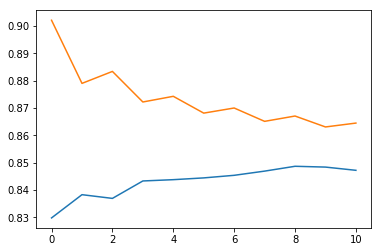

In [35]:
acc_score2=[]
acc_score2_train=[]
y2_=[]
for i in range (3,14):
    model2 = KNeighborsClassifier(n_neighbors=i,metric='minkowski')
    model2.fit(X_train,y_train)
    y_pred2=model2.predict(X_test)
    y_pred2_train=model2.predict(X_train)
    y2_.append(y_pred2)
    print(confusion_matrix(y_test,y_pred2),'(Test)k =', i)
    print(classification_report(y_test,y_pred2))
    print(accuracy_score(y_test,y_pred2))
    print(confusion_matrix(y_train,y_pred2_train),'(Train)k =', i)
    print(classification_report(y_train,y_pred2_train))
    print(accuracy_score(y_train,y_pred2_train))
    acc_score2.append(accuracy_score(y_test,y_pred2))
    acc_score2_train.append(accuracy_score(y_train,y_pred2_train))
plt.plot(acc_score2)
plt.plot(acc_score2_train)

In [8]:
## 3 Hidden Layers - First hidden layer with 100 neurons, second & Third  with 50 & 25 neurons - Activation function we will use relu

input_shap=15
classifier = Sequential()
classifier.add(Dense(100, kernel_initializer='uniform', activation= 'relu', input_shape =(input_shap,)))
classifier.add(Dense(50, kernel_initializer='uniform', activation= 'relu'))
classifier.add(Dense(25, kernel_initializer='uniform', activation= 'relu'))
classifier.add(Dense(1, kernel_initializer= 'uniform', activation= 'sigmoid'))
classifier.compile(optimizer= 'adam',loss='binary_crossentropy', metrics=['accuracy'])
hist = classifier.fit(X_train, y_train, batch_size = 10, epochs = 10)
y_predict = classifier.predict(X_test)
y_predict = np.where(y_predict > 0.5,1,0)
y_test1=np.asarray(y_test)
y_test1=np.reshape(y_test1,(len(y_test1),1))
y_test1=np.concatenate(y_test1).astype(None)
print(confusion_matrix(y_test1,y_predict))  
print(classification_report(y_test1,y_predict))
acc_score3=accuracy_score(y_test1,y_predict)
print(acc_score3)

Epoch 1/10
39494/39494 [==============================] - 7s 172us/step - loss: 0.3519 - acc: 0.8485
Epoch 2/10
39494/39494 [==============================] - 7s 165us/step - loss: 0.3386 - acc: 0.8542
Epoch 3/10
39494/39494 [==============================] - 7s 166us/step - loss: 0.3348 - acc: 0.8561
Epoch 4/10
39494/39494 [==============================] - 7s 166us/step - loss: 0.3332 - acc: 0.8562
Epoch 5/10
39494/39494 [==============================] - 6s 158us/step - loss: 0.3323 - acc: 0.8568
Epoch 6/10
39494/39494 [==============================] - 6s 164us/step - loss: 0.3305 - acc: 0.8563
Epoch 7/10
39494/39494 [==============================] - 6s 160us/step - loss: 0.3295 - acc: 0.8572
Epoch 8/10
39494/39494 [==============================] - 6s 163us/step - loss: 0.3285 - acc: 0.8575
Epoch 9/10
39494/39494 [==============================] - 6s 162us/step - loss: 0.3268 - acc: 0.8581
Epoch 10/10
39494/39494 [==============================] - 6s 164us/step - loss: 0.3263 - a

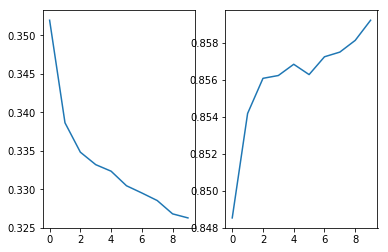

In [9]:
plt.subplot(1,2,1)
plt.plot(hist.history['loss'])
plt.subplot(1,2,2)
plt.plot(hist.history['acc'])

In [11]:
## 2 Hidden Layers - First hidden layer with 50 neurons and second with 25 neurons with activation fucntion tanh

input_shap=15
classifier = Sequential()
classifier.add(Dense(50, kernel_initializer='uniform', activation= 'tanh', input_shape =(input_shap,)))
classifier.add(Dense(25, kernel_initializer='uniform', activation= 'tanh'))
classifier.add(Dense(1, kernel_initializer= 'uniform', activation= 'sigmoid'))
classifier.compile(optimizer= 'adam',loss='binary_crossentropy', metrics=['accuracy'])
hist1 = classifier.fit(X_train, y_train, batch_size = 10, epochs = 10)
y_predict1 = classifier.predict(X_test)
y_predict1 = np.where(y_predict1 > 0.5,1,0)
print(confusion_matrix(y_test1,y_predict1))  
print(classification_report(y_test1,y_predict1))
acc_score4=accuracy_score(y_test1,y_predict1)
print(acc_score4)

Epoch 1/10
39494/39494 [==============================] - 7s 171us/step - loss: 0.3531 - acc: 0.8493
Epoch 2/10
39494/39494 [==============================] - 6s 155us/step - loss: 0.3434 - acc: 0.8523
Epoch 3/10
39494/39494 [==============================] - 6s 154us/step - loss: 0.3426 - acc: 0.8525
Epoch 4/10
39494/39494 [==============================] - 6s 155us/step - loss: 0.3416 - acc: 0.8523
Epoch 5/10
39494/39494 [==============================] - 6s 152us/step - loss: 0.3404 - acc: 0.8534
Epoch 6/10
39494/39494 [==============================] - 6s 155us/step - loss: 0.3392 - acc: 0.8537
Epoch 7/10
39494/39494 [==============================] - 6s 155us/step - loss: 0.3382 - acc: 0.8531
Epoch 8/10
39494/39494 [==============================] - 6s 156us/step - loss: 0.3377 - acc: 0.8541
Epoch 9/10
39494/39494 [==============================] - 6s 156us/step - loss: 0.3365 - acc: 0.8547
Epoch 10/10
39494/39494 [==============================] - 6s 156us/step - loss: 0.3356 - a

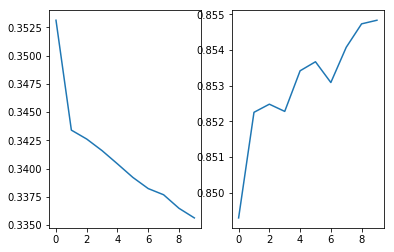

In [12]:
plt.subplot(1,2,1)
plt.plot(hist1.history['loss'])
plt.subplot(1,2,2)
plt.plot(hist1.history['acc'])

In [13]:
## 3 Hidden Layers - First hidden layer with 100 neurons and second & Third with 50 & 25 neurons with activation fucntion tanh

input_shap=15
classifier = Sequential()
classifier.add(Dense(100, kernel_initializer='uniform', activation= 'tanh', input_shape =(input_shap,)))
classifier.add(Dense(50, kernel_initializer='uniform', activation= 'tanh'))
classifier.add(Dense(25, kernel_initializer='uniform', activation= 'tanh'))
classifier.add(Dense(1, kernel_initializer= 'uniform', activation= 'sigmoid'))
classifier.compile(optimizer= 'adam',loss='binary_crossentropy', metrics=['accuracy'])
hist2 = classifier.fit(X_train, y_train, batch_size = 10, epochs = 10)
y_predict2 = classifier.predict(X_test)
y_predict2 = np.where(y_predict2 > 0.5,1,0)
print(confusion_matrix(y_test1,y_predict2))  
print(classification_report(y_test1,y_predict2))
acc_score5=accuracy_score(y_test1,y_predict2)
print(acc_score5)

Epoch 1/10
39494/39494 [==============================] - 7s 174us/step - loss: 0.3555 - acc: 0.8475
Epoch 2/10
39494/39494 [==============================] - 7s 169us/step - loss: 0.3470 - acc: 0.8521
Epoch 3/10
39494/39494 [==============================] - 7s 169us/step - loss: 0.3456 - acc: 0.8523
Epoch 4/10
39494/39494 [==============================] - 7s 169us/step - loss: 0.3448 - acc: 0.8507
Epoch 5/10
39494/39494 [==============================] - 7s 168us/step - loss: 0.3432 - acc: 0.8521
Epoch 6/10
39494/39494 [==============================] - 7s 169us/step - loss: 0.3433 - acc: 0.8532
Epoch 7/10
39494/39494 [==============================] - 7s 168us/step - loss: 0.3424 - acc: 0.8529
Epoch 8/10
39494/39494 [==============================] - 7s 168us/step - loss: 0.3415 - acc: 0.8531
Epoch 9/10
39494/39494 [==============================] - 7s 170us/step - loss: 0.3409 - acc: 0.8538
Epoch 10/10
39494/39494 [==============================] - 7s 170us/step - loss: 0.3401 - a

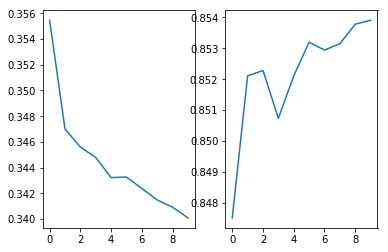

In [14]:
plt.subplot(1,2,1)
plt.plot(hist2.history['loss'])
plt.subplot(1,2,2)
plt.plot(hist2.history['acc'])

Epoch 1/10
39494/39494 [==============================] - 8s 213us/step - loss: 0.3588 - acc: 0.8486
Epoch 2/10
39494/39494 [==============================] - 8s 193us/step - loss: 0.3502 - acc: 0.8501
Epoch 3/10
39494/39494 [==============================] - 8s 191us/step - loss: 0.3487 - acc: 0.8509
Epoch 4/10
39494/39494 [==============================] - 8s 193us/step - loss: 0.3474 - acc: 0.8518
Epoch 5/10
39494/39494 [==============================] - 8s 195us/step - loss: 0.3469 - acc: 0.8504
Epoch 6/10
39494/39494 [==============================] - 8s 194us/step - loss: 0.3458 - acc: 0.8518
Epoch 7/10
39494/39494 [==============================] - 8s 195us/step - loss: 0.3452 - acc: 0.8524
Epoch 8/10
39494/39494 [==============================] - 8s 197us/step - loss: 0.3450 - acc: 0.8524
Epoch 9/10
39494/39494 [==============================] - 8s 196us/step - loss: 0.3438 - acc: 0.8539
Epoch 10/10
39494/39494 [==============================] - 8s 195us/step - loss: 0.3435 - a

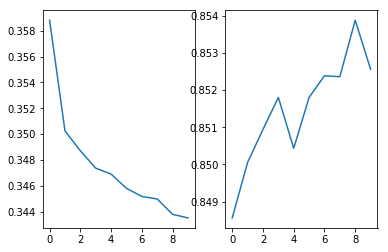

In [16]:
## 4 Hidden Layers - First hidden layer with 150 neurons and second & Third with 100 , 50 & 25 neurons with activation fucntion tanh

input_shap=15
classifier = Sequential()
classifier.add(Dense(150, kernel_initializer='uniform', activation= 'tanh', input_shape =(input_shap,)))
classifier.add(Dense(100, kernel_initializer='uniform', activation= 'tanh'))
classifier.add(Dense(50, kernel_initializer='uniform', activation= 'tanh'))
classifier.add(Dense(25, kernel_initializer='uniform', activation= 'tanh'))
classifier.add(Dense(1, kernel_initializer= 'uniform', activation= 'sigmoid'))
classifier.compile(optimizer= 'adam',loss='binary_crossentropy', metrics=['accuracy'])
hist3 = classifier.fit(X_train, y_train, batch_size = 10, epochs = 10)
y_predict3 = classifier.predict(X_test)
y_predict3 = np.where(y_predict3 > 0.5,1,0)
print(confusion_matrix(y_test1,y_predict3))  
print(classification_report(y_test1,y_predict3))
acc_score6=accuracy_score(y_test1,y_predict3)
print(acc_score6)
plt.subplot(1,2,1)
plt.plot(hist3.history['loss'])
plt.subplot(1,2,2)
plt.plot(hist3.history['acc'])

Epoch 1/10
39494/39494 [==============================] - 8s 210us/step - loss: 0.4650 - acc: 0.8305
Epoch 2/10
39494/39494 [==============================] - 7s 175us/step - loss: 0.4494 - acc: 0.8238
Epoch 3/10
39494/39494 [==============================] - 7s 178us/step - loss: 0.4388 - acc: 0.8215
Epoch 4/10
39494/39494 [==============================] - 7s 179us/step - loss: 0.4279 - acc: 0.8442
Epoch 5/10
39494/39494 [==============================] - 7s 176us/step - loss: 0.4067 - acc: 0.8473
Epoch 6/10
39494/39494 [==============================] - ETA: 0s - loss: 0.4043 - acc: 0.845 - 7s 176us/step - loss: 0.4053 - acc: 0.8457
Epoch 7/10
39494/39494 [==============================] - 7s 176us/step - loss: 0.4232 - acc: 0.8304
Epoch 8/10
39494/39494 [==============================] - 7s 176us/step - loss: 0.4066 - acc: 0.8404
Epoch 9/10
39494/39494 [==============================] - 7s 176us/step - loss: 0.3684 - acc: 0.8514
Epoch 10/10
39494/39494 [============================

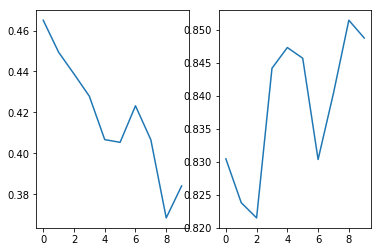

In [17]:
## 3 Hidden Layers - First hidden layer with 100 neurons and second & Third with 50 & 25 neurons with fully activation fucntion tanh

input_shap=15
classifier = Sequential()
classifier.add(Dense(100, kernel_initializer='uniform', activation= 'tanh', input_shape =(input_shap,)))
classifier.add(Dense(50, kernel_initializer='uniform', activation= 'tanh'))
classifier.add(Dense(25, kernel_initializer='uniform', activation= 'tanh'))
classifier.add(Dense(1, kernel_initializer= 'uniform', activation= 'tanh'))
classifier.compile(optimizer= 'adam',loss='binary_crossentropy', metrics=['accuracy'])
hist4 = classifier.fit(X_train, y_train, batch_size = 10, epochs = 10)
y_predict4 = classifier.predict(X_test)
y_predict4 = np.where(y_predict4 > 0.5,1,0)
print(confusion_matrix(y_test1,y_predict4))  
print(classification_report(y_test1,y_predict4))
acc_score7=accuracy_score(y_test1,y_predict4)
print(acc_score7)
plt.subplot(1,2,1)
plt.plot(hist4.history['loss'])
plt.subplot(1,2,2)
plt.plot(hist4.history['acc'])

Epoch 1/10
39494/39494 [==============================] - 10s 258us/step - loss: 0.3904 - acc: 0.8294
Epoch 2/10
39494/39494 [==============================] - 7s 177us/step - loss: 0.3467 - acc: 0.8520
Epoch 3/10
39494/39494 [==============================] - 7s 177us/step - loss: 0.3417 - acc: 0.8527
Epoch 4/10
39494/39494 [==============================] - 7s 177us/step - loss: 0.3398 - acc: 0.8532
Epoch 5/10
39494/39494 [==============================] - 7s 177us/step - loss: 0.3386 - acc: 0.8546
Epoch 6/10
39494/39494 [==============================] - 7s 177us/step - loss: 0.3374 - acc: 0.8551
Epoch 7/10
39494/39494 [==============================] - 7s 181us/step - loss: 0.3367 - acc: 0.8550
Epoch 8/10
39494/39494 [==============================] - 7s 178us/step - loss: 0.3358 - acc: 0.8550
Epoch 9/10
39494/39494 [==============================] - 7s 178us/step - loss: 0.3351 - acc: 0.8546
Epoch 10/10
39494/39494 [==============================] - 7s 178us/step - loss: 0.3343 - 

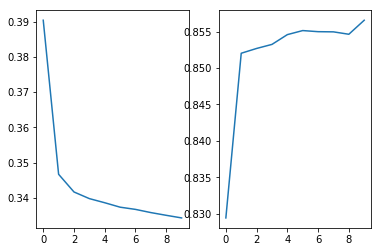

In [18]:
## 3 Hidden Layers - First hidden layer with 100 neurons and second & Third with 50 & 25 neurons with fully activation fucntion sigmoid

input_shap=15
classifier = Sequential()
classifier.add(Dense(100, kernel_initializer='uniform', activation= 'sigmoid', input_shape =(input_shap,)))
classifier.add(Dense(50, kernel_initializer='uniform', activation= 'sigmoid'))
classifier.add(Dense(25, kernel_initializer='uniform', activation= 'sigmoid'))
classifier.add(Dense(1, kernel_initializer= 'uniform', activation= 'sigmoid'))
classifier.compile(optimizer= 'adam',loss='binary_crossentropy', metrics=['accuracy'])
hist5 = classifier.fit(X_train, y_train, batch_size = 10, epochs = 10)
y_predict5 = classifier.predict(X_test)
y_predict5 = np.where(y_predict5 > 0.5,1,0)
print(confusion_matrix(y_test1,y_predict5))  
print(classification_report(y_test1,y_predict5))
acc_score8=accuracy_score(y_test1,y_predict5)
print(acc_score8)
plt.subplot(1,2,1)
plt.plot(hist5.history['loss'])
plt.subplot(1,2,2)
plt.plot(hist5.history['acc'])

Epoch 1/10
39494/39494 [==============================] - 4s 93us/step - loss: 0.3534 - acc: 0.8471
Epoch 2/10
39494/39494 [==============================] - 3s 79us/step - loss: 0.3376 - acc: 0.8548
Epoch 3/10
39494/39494 [==============================] - 3s 80us/step - loss: 0.3365 - acc: 0.8551
Epoch 4/10
39494/39494 [==============================] - 3s 80us/step - loss: 0.3353 - acc: 0.8554: 0s - loss: 0.3375
Epoch 5/10
39494/39494 [==============================] - 3s 82us/step - loss: 0.3335 - acc: 0.8567
Epoch 6/10
39494/39494 [==============================] - 3s 80us/step - loss: 0.3325 - acc: 0.8568
Epoch 7/10
39494/39494 [==============================] - 3s 83us/step - loss: 0.3315 - acc: 0.8592
Epoch 8/10
39494/39494 [==============================] - 4s 99us/step - loss: 0.3300 - acc: 0.8570
Epoch 9/10
39494/39494 [==============================] - 4s 107us/step - loss: 0.3298 - acc: 0.8576
Epoch 10/10
39494/39494 [==============================] - 4s 102us/step - loss:

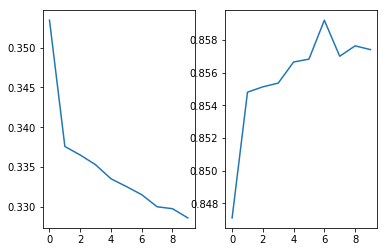

In [21]:
### Experiment various number of neurons with 3 layers and relu function for hidden layers and sigmoid function for the output layers

input_shap=15
classifier = Sequential()
classifier.add(Dense(50, kernel_initializer='uniform', activation= 'relu', input_shape =(input_shap,)))
classifier.add(Dense(25, kernel_initializer='uniform', activation= 'relu'))
classifier.add(Dense(12, kernel_initializer='uniform', activation= 'relu'))
classifier.add(Dense(1, kernel_initializer= 'uniform', activation= 'sigmoid'))
classifier.compile(optimizer= 'adam',loss='binary_crossentropy', metrics=['accuracy'])
hist6 = classifier.fit(X_train, y_train, batch_size = 10, epochs = 10)
y_predict6 = classifier.predict(X_test)
y_predict6 = np.where(y_predict6 > 0.5,1,0)
print(confusion_matrix(y_test1,y_predict6))  
print(classification_report(y_test1,y_predict6))
acc_score9=accuracy_score(y_test1,y_predict6)
print(acc_score9)
plt.subplot(1,2,1)
plt.plot(hist6.history['loss'])
plt.subplot(1,2,2)
plt.plot(hist6.history['acc'])

Epoch 1/10
39494/39494 [==============================] - 4s 95us/step - loss: 0.3619 - acc: 0.8444
Epoch 2/10
39494/39494 [==============================] - 3s 77us/step - loss: 0.3383 - acc: 0.8538
Epoch 3/10
39494/39494 [==============================] - 3s 76us/step - loss: 0.3361 - acc: 0.8546
Epoch 4/10
39494/39494 [==============================] - 3s 76us/step - loss: 0.3343 - acc: 0.8568
Epoch 5/10
39494/39494 [==============================] - 3s 80us/step - loss: 0.3336 - acc: 0.8570
Epoch 6/10
39494/39494 [==============================] - 4s 90us/step - loss: 0.3330 - acc: 0.8569
Epoch 7/10
39494/39494 [==============================] - 4s 103us/step - loss: 0.3329 - acc: 0.8565
Epoch 8/10
39494/39494 [==============================] - 4s 103us/step - loss: 0.3322 - acc: 0.8569
Epoch 9/10
39494/39494 [==============================] - 4s 101us/step - loss: 0.3315 - acc: 0.8580
Epoch 10/10
39494/39494 [==============================] - 4s 99us/step - loss: 0.3313 - acc: 0.8

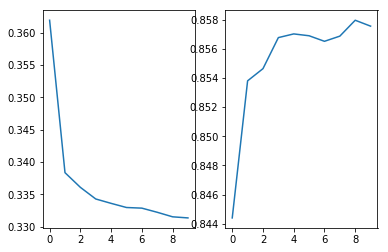

In [22]:
input_shap=15
classifier = Sequential()
classifier.add(Dense(20, kernel_initializer='uniform', activation= 'relu', input_shape =(input_shap,)))
classifier.add(Dense(10, kernel_initializer='uniform', activation= 'relu'))
classifier.add(Dense(5, kernel_initializer='uniform', activation= 'relu'))
classifier.add(Dense(1, kernel_initializer= 'uniform', activation= 'sigmoid'))
classifier.compile(optimizer= 'adam',loss='binary_crossentropy', metrics=['accuracy'])
hist7 = classifier.fit(X_train, y_train, batch_size = 10, epochs = 10)
y_predict7 = classifier.predict(X_test)
y_predict7 = np.where(y_predict7 > 0.5,1,0)
print(confusion_matrix(y_test1,y_predict7))  
print(classification_report(y_test1,y_predict7))
acc_score10=accuracy_score(y_test1,y_predict7)
print(acc_score10)
plt.subplot(1,2,1)
plt.plot(hist7.history['loss'])
plt.subplot(1,2,2)
plt.plot(hist7.history['acc'])

Epoch 1/10
39494/39494 [==============================] - 4s 99us/step - loss: 0.3681 - acc: 0.8414: 0s - loss: 0.3695 - acc: 0.8
Epoch 2/10
39494/39494 [==============================] - 3s 81us/step - loss: 0.3403 - acc: 0.8540
Epoch 3/10
39494/39494 [==============================] - 3s 82us/step - loss: 0.3378 - acc: 0.8541
Epoch 4/10
39494/39494 [==============================] - 3s 82us/step - loss: 0.3366 - acc: 0.8548
Epoch 5/10
39494/39494 [==============================] - 3s 86us/step - loss: 0.3355 - acc: 0.8559
Epoch 6/10
39494/39494 [==============================] - 4s 101us/step - loss: 0.3348 - acc: 0.8566
Epoch 7/10
39494/39494 [==============================] - 4s 102us/step - loss: 0.3344 - acc: 0.8558
Epoch 8/10
39494/39494 [==============================] - 4s 101us/step - loss: 0.3338 - acc: 0.8555
Epoch 9/10
39494/39494 [==============================] - 4s 101us/step - loss: 0.3339 - acc: 0.8560
Epoch 10/10
39494/39494 [==============================] - 4s 101u

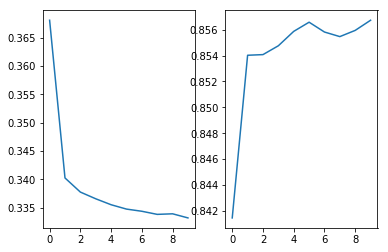

In [23]:
input_shap=15
classifier = Sequential()
classifier.add(Dense(10, kernel_initializer='uniform', activation= 'relu', input_shape =(input_shap,)))
classifier.add(Dense(5, kernel_initializer='uniform', activation= 'relu'))
classifier.add(Dense(3, kernel_initializer='uniform', activation= 'relu'))
classifier.add(Dense(1, kernel_initializer= 'uniform', activation= 'sigmoid'))
classifier.compile(optimizer= 'adam',loss='binary_crossentropy', metrics=['accuracy'])
hist8 = classifier.fit(X_train, y_train, batch_size = 10, epochs = 10)
y_predict8 = classifier.predict(X_test)
y_predict8 = np.where(y_predict8 > 0.5,1,0)
print(confusion_matrix(y_test1,y_predict8))  
print(classification_report(y_test1,y_predict8))
acc_score11=accuracy_score(y_test1,y_predict8)
print(acc_score11)
plt.subplot(1,2,1)
plt.plot(hist8.history['loss'])
plt.subplot(1,2,2)
plt.plot(hist8.history['acc'])

In [25]:
## We will experiment with various optimizer function

input_shap=15
classifier = Sequential()
classifier.add(Dense(10, kernel_initializer='uniform', activation= 'relu', input_shape =(input_shap,)))
classifier.add(Dense(5, kernel_initializer='uniform', activation= 'relu'))
classifier.add(Dense(3, kernel_initializer='uniform', activation= 'relu'))
classifier.add(Dense(1, kernel_initializer= 'uniform', activation= 'sigmoid'))
classifier.compile(optimizer= 'SGD',loss='binary_crossentropy', metrics=['accuracy'])
hist9 = classifier.fit(X_train, y_train, batch_size = 10, epochs = 10)
y_predict9 = classifier.predict(X_test)
y_predict9 = np.where(y_predict9 > 0.5,1,0)
print(confusion_matrix(y_test1,y_predict9))  
print(classification_report(y_test1,y_predict9))
acc_score12=accuracy_score(y_test1,y_predict9)
print(acc_score12)

Epoch 1/10
39494/39494 [==============================] - 4s 92us/step - loss: 0.5393 - acc: 0.7779
Epoch 2/10
39494/39494 [==============================] - 3s 66us/step - loss: 0.5295 - acc: 0.7780
Epoch 3/10
39494/39494 [==============================] - 3s 70us/step - loss: 0.5295 - acc: 0.7780
Epoch 4/10
39494/39494 [==============================] - 3s 72us/step - loss: 0.5295 - acc: 0.7780
Epoch 5/10
39494/39494 [==============================] - 3s 71us/step - loss: 0.5295 - acc: 0.7780
Epoch 6/10
39494/39494 [==============================] - 3s 73us/step - loss: 0.5295 - acc: 0.7780
Epoch 7/10
39494/39494 [==============================] - 3s 82us/step - loss: 0.5295 - acc: 0.7780
Epoch 8/10
39494/39494 [==============================] - 4s 99us/step - loss: 0.5295 - acc: 0.7780
Epoch 9/10
39494/39494 [==============================] - 4s 94us/step - loss: 0.5295 - acc: 0.7780
Epoch 10/10
39494/39494 [==============================] - 3s 88us/step - loss: 0.5294 - acc: 0.7780

C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


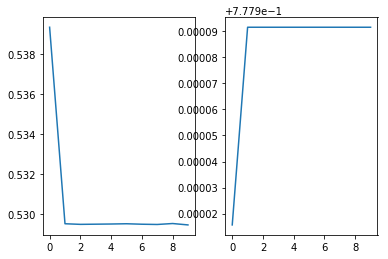

In [26]:
plt.subplot(1,2,1)
plt.plot(hist9.history['loss'])
plt.subplot(1,2,2)
plt.plot(hist9.history['acc'])

Epoch 1/10
39494/39494 [==============================] - 4s 102us/step - loss: 0.3711 - acc: 0.8411
Epoch 2/10
39494/39494 [==============================] - 3s 79us/step - loss: 0.3446 - acc: 0.8530
Epoch 3/10
39494/39494 [==============================] - 3s 75us/step - loss: 0.3394 - acc: 0.8555
Epoch 4/10
39494/39494 [==============================] - 3s 75us/step - loss: 0.3366 - acc: 0.8559
Epoch 5/10
39494/39494 [==============================] - 3s 84us/step - loss: 0.3351 - acc: 0.8569
Epoch 6/10
39494/39494 [==============================] - 4s 105us/step - loss: 0.3340 - acc: 0.8570
Epoch 7/10
39494/39494 [==============================] - 4s 108us/step - loss: 0.3336 - acc: 0.8580
Epoch 8/10
39494/39494 [==============================] - 4s 110us/step - loss: 0.3332 - acc: 0.8572
Epoch 9/10
39494/39494 [==============================] - 4s 107us/step - loss: 0.3325 - acc: 0.8580
Epoch 10/10
39494/39494 [==============================] - 4s 108us/step - loss: 0.3321 - acc: 

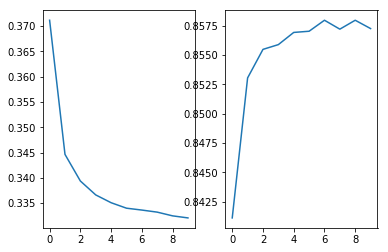

In [28]:
## We will experiment with various optimizer function

input_shap=15
classifier = Sequential()
classifier.add(Dense(10, kernel_initializer='uniform', activation= 'relu', input_shape =(input_shap,)))
classifier.add(Dense(5, kernel_initializer='uniform', activation= 'relu'))
classifier.add(Dense(3, kernel_initializer='uniform', activation= 'relu'))
classifier.add(Dense(1, kernel_initializer= 'uniform', activation= 'sigmoid'))
classifier.compile(optimizer= 'AdaDelta',loss='binary_crossentropy', metrics=['accuracy'])
hist10 = classifier.fit(X_train, y_train, batch_size = 10, epochs = 10)
y_predict10 = classifier.predict(X_test)
y_predict10 = np.where(y_predict10 > 0.5,1,0)
print(confusion_matrix(y_test1,y_predict10))  
print(classification_report(y_test1,y_predict10))
acc_score13=accuracy_score(y_test1,y_predict10)
print(acc_score13)
plt.subplot(1,2,1)
plt.plot(hist10.history['loss'])
plt.subplot(1,2,2)
plt.plot(hist10.history['acc'])

Epoch 1/10
39494/39494 [==============================] - 4s 99us/step - loss: 0.4001 - acc: 0.7791
Epoch 2/10
39494/39494 [==============================] - 3s 84us/step - loss: 0.3775 - acc: 0.8397
Epoch 3/10
39494/39494 [==============================] - 4s 98us/step - loss: 0.3706 - acc: 0.8436
Epoch 4/10
39494/39494 [==============================] - 4s 98us/step - loss: 0.3662 - acc: 0.8463
Epoch 5/10
39494/39494 [==============================] - 4s 97us/step - loss: 0.3630 - acc: 0.8485
Epoch 6/10
39494/39494 [==============================] - 4s 100us/step - loss: 0.3605 - acc: 0.8493
Epoch 7/10
39494/39494 [==============================] - 4s 102us/step - loss: 0.3586 - acc: 0.8504
Epoch 8/10
39494/39494 [==============================] - 4s 96us/step - loss: 0.3569 - acc: 0.8515
Epoch 9/10
39494/39494 [==============================] - 4s 95us/step - loss: 0.3555 - acc: 0.8518
Epoch 10/10
39494/39494 [==============================] - 4s 95us/step - loss: 0.3543 - acc: 0.85

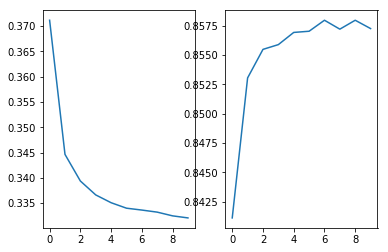

In [29]:
## We will experiment with various optimizer function

input_shap=15
classifier = Sequential()
classifier.add(Dense(10, kernel_initializer='uniform', activation= 'relu', input_shape =(input_shap,)))
classifier.add(Dense(5, kernel_initializer='uniform', activation= 'relu'))
classifier.add(Dense(3, kernel_initializer='uniform', activation= 'relu'))
classifier.add(Dense(1, kernel_initializer= 'uniform', activation= 'sigmoid'))
classifier.compile(optimizer= 'AdaGrad',loss='binary_crossentropy', metrics=['accuracy'])
hist11 = classifier.fit(X_train, y_train, batch_size = 10, epochs = 10)
y_predict11 = classifier.predict(X_test)
y_predict11 = np.where(y_predict11 > 0.5,1,0)
print(confusion_matrix(y_test1,y_predict11))  
print(classification_report(y_test1,y_predict11))
acc_score14=accuracy_score(y_test1,y_predict11)
print(acc_score14)
plt.subplot(1,2,1)
plt.plot(hist10.history['loss'])
plt.subplot(1,2,2)
plt.plot(hist10.history['acc'])

Text(0.5, 1.0, 'Train and Test Accuracy as a function of K Value for Euclidean distance')

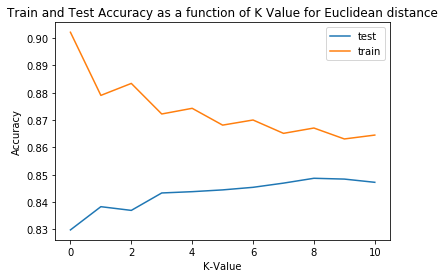

In [32]:
plt.plot(acc_score,label='test')
plt.plot(acc_score_train,label='train')
plt.xlabel("K-Value")
plt.ylabel("Accuracy")
plt.legend(loc='upper right')
plt.title("Train and Test Accuracy as a function of K Value for Euclidean distance")

Text(0.5, 1.0, 'Train and Test Accuracy as a function of K Value for Manhattan distance')

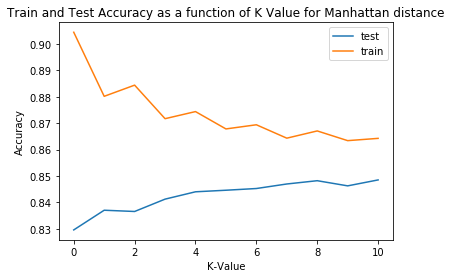

In [33]:
plt.plot(acc_score1,label='test')
plt.plot(acc_score1_train,label='train')
plt.xlabel("K-Value")
plt.ylabel("Accuracy")
plt.legend(loc='upper right')
plt.title("Train and Test Accuracy as a function of K Value for Manhattan distance")

Text(0.5, 1.0, 'Train and Test Accuracy as a function of K Value for Minkowski distance')

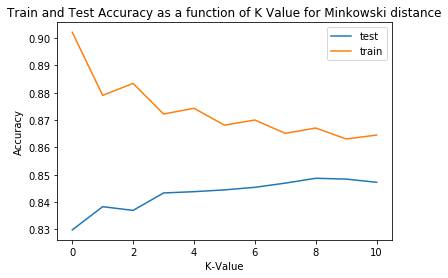

In [36]:
plt.plot(acc_score2,label='test')
plt.plot(acc_score2_train,label='train')
plt.xlabel("K-Value")
plt.ylabel("Accuracy")
plt.legend(loc='upper right')
plt.title("Train and Test Accuracy as a function of K Value for Minkowski distance")

Text(0.5, 1.0, 'Train and Test Accuracy as a function of Number of Hidden Layers in ANN')

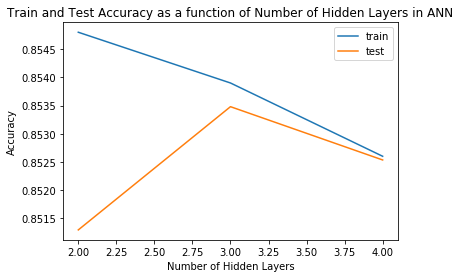

In [37]:
### plots for Train and Test accuracy as a function of Number of layers
test_accuracy = [acc_score4,acc_score5,acc_score6]
train_accuracy=[0.8548,0.8539,0.8526]
layers=[2,3,4]
plt.plot(layers,train_accuracy,label='train')
plt.plot(layers,test_accuracy,label='test')
plt.xlabel("Number of Hidden Layers")
plt.ylabel("Accuracy")
plt.legend(loc='upper right')
plt.title("Train and Test Accuracy as a function of Number of Hidden Layers in ANN")

Text(0.5, 1.0, 'Train and Test Accuracy for various Activation functions in ANN')

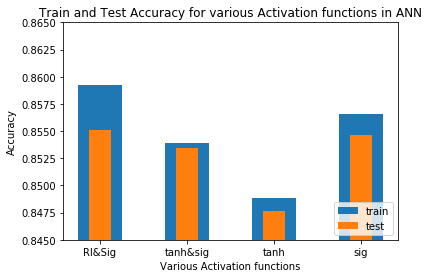

In [40]:
### plots for Train and Test accuracy for various activation functions
test_accuracy = [acc_score3,acc_score5,acc_score7,acc_score8]
train_accuracy=[0.8592,0.8539,0.8488,0.8566]
Act_fun=["Rl&Sig","tanh&sig","tanh","sig"]

plt.bar(Act_fun,train_accuracy,label='train',width=0.5)
plt.bar(Act_fun,test_accuracy,label='test',width=0.25)
plt.xlabel("Various Activation functions")
plt.ylim([0.845, 0.865])
plt.ylabel("Accuracy")
plt.legend(loc='lower right')
plt.title("Train and Test Accuracy for various Activation functions in ANN")

Text(0.5, 1.0, 'Train and Test Accuracy for various Number of Neurons')

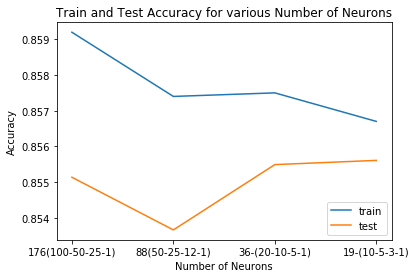

In [41]:
### plots for Train and Test accuracy for Increasing Number of Neurons
test_accuracy = [acc_score3,acc_score9,acc_score10,acc_score11]
train_accuracy=[0.8592,0.8574,0.8575,0.8567]
Num_of_Neurons=["176(100-50-25-1)","88(50-25-12-1)","36-(20-10-5-1)","19-(10-5-3-1)"]

plt.plot(Num_of_Neurons,train_accuracy,label='train')
plt.plot(Num_of_Neurons,test_accuracy,label='test')
plt.xlabel("Number of Neurons")
plt.ylabel("Accuracy")
plt.legend(loc='lower right')
plt.title("Train and Test Accuracy for various Number of Neurons")

Text(0.5, 1.0, 'Train and Test Accuracy for various Optimizer functions in ANN')

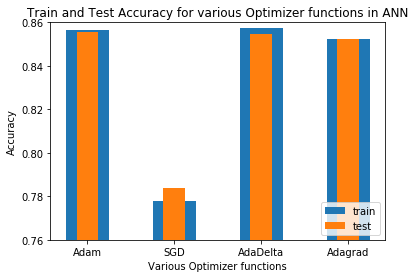

In [45]:
### Plots for Train and Test Accuracy for various optimizer function
test_accuracy = [acc_score11,acc_score12,acc_score13,acc_score14]
train_accuracy=[0.8567,0.778,0.8572,0.8523]
Opt_fun=["Adam","SGD","AdaDelta","Adagrad"]

plt.bar(Opt_fun,train_accuracy,label='train',width=0.5)
plt.bar(Opt_fun,test_accuracy,label='test',width=0.25)
plt.xlabel("Various Optimizer functions")
plt.ylim([0.76, 0.86])
plt.ylabel("Accuracy")
plt.legend(loc='lower right')
plt.title("Train and Test Accuracy for various Optimizer functions in ANN")